# Clustering

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import k_means
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [4]:
df1=pd.read_csv("crime_data.csv")
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
DATA=df1.rename({"Unnamed: 0":"Name"},axis=1)
DATA

,Name,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [17]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [19]:
Crime=DATA.drop(['Name'],axis=1)
Crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [20]:
array=Crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [22]:
Scaler=StandardScaler().fit(array)
x=Scaler.transform(array)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

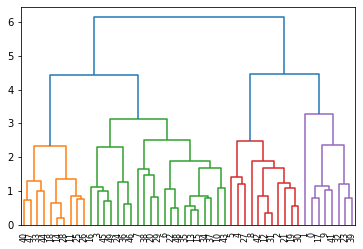

In [23]:
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'))

In [25]:
HC = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
HC

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [26]:
AgglomerativeClustering(linkage='complete', n_clusters=5)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [28]:
y_hc = HC.fit_predict(x)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [29]:
Clusters

,Clusters
0,1
1,4
2,2
3,0
4,2
5,2
6,0
7,0
8,2
9,1


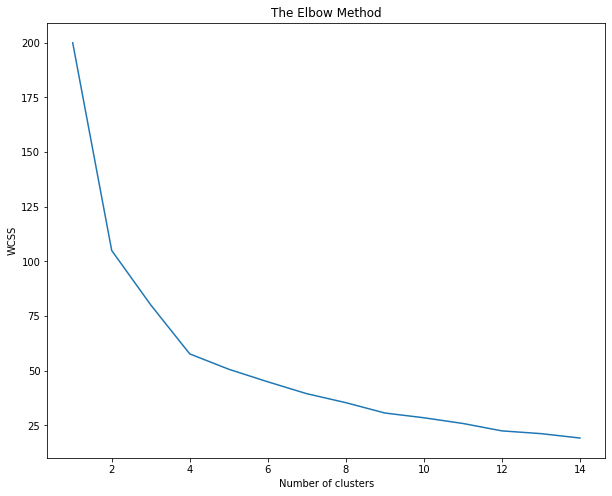

In [30]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(x)

In [32]:
y_kmeans

array([3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 0,
       2, 3, 0, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 2, 1])

In [33]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [34]:
DATA['cluster'] = cluster

In [35]:
kmeans_mean_cluster = pd.DataFrame(round(DATA.groupby('cluster').mean(),1))
kmeans_mean_cluster

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_19476\4228172176.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_mean_cluster = pd.DataFrame(round(DATA.groupby('cluster').mean(),1))


,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,10.8,257.4,76.0,33.2
2,5.7,138.9,73.9,18.8
3,3.6,78.5,52.1,12.2
4,13.9,243.6,53.8,21.4


In [37]:
stats = DATA.sort_values("Rape", ascending=True)
total= pd.DataFrame(stats)
total

,Name,Murder,Assault,UrbanPop,Rape,cluster
33,North Dakota,0.8,45,44,7.3,3
18,Maine,2.1,83,51,7.8,3
38,Rhode Island,3.4,174,87,8.3,2
47,West Virginia,5.7,81,39,9.3,3
28,New Hampshire,2.1,57,56,9.5,3
48,Wisconsin,2.6,53,66,10.8,3
6,Connecticut,3.3,110,77,11.1,2
44,Vermont,2.2,48,32,11.2,3
14,Iowa,2.2,56,57,11.3,3
40,South Dakota,3.8,86,45,12.8,3
